In [ ]:
#信用卡違約發生在您對信用卡付款嚴重拖欠的情況下。偶爾錯過信用卡付款不算違約。
#只有在連續幾個月未支付信用卡的最低應付金額時，才會發生違約。



# ID: ID of each client

###信用額度
# LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

# SEX: Gender (1=male, 2=female)
# EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
# MARRIAGE: Marital status (1=married, 2=single, 3=others)
# AGE: Age in years

#（-1=按時還款，1=一個月遲繳，2=兩個月遲繳，... 8=八個月遲繳，9=九個月及以上遲繳）
# PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
# PAY_2: Repayment status in August, 2005 (scale same as above)
# PAY_3: Repayment status in July, 2005 (scale same as above)
# PAY_4: Repayment status in June, 2005 (scale same as above)
# PAY_5: Repayment status in May, 2005 (scale same as above)
# PAY_6: Repayment status in April, 2005 (scale same as above)

###帳單金額
# BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
# BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
# BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
# BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
# BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
# BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

###付款金額
# PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
# PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
# PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
# PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
# PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
# PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
# default.payment.next.month: Default payment (1=yes, 0=no)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('C:/Users/leo/Desktop/credit card.csv')
data = data.iloc[:,1:]
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [3]:
data = data.rename(columns={'PAY_0':'PAY_1',
                            'default.payment.next.month':'def_pay'})

data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
data[['SEX','EDUCATION','MARRIAGE']].describe()

#'education'最小值為0(代表有缺失值)、5和6為unknown
#'marriage'最小值為0(缺失值)

fil = (data['EDUCATION'] == 0) | (data['EDUCATION'] == 5) | (data['EDUCATION'] == 6)
data.loc[fil , 'EDUCATION'] = 4

data.loc[data['MARRIAGE'] == 0 , 'MARRIAGE'] = 3

data[['SEX','EDUCATION','MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.842267,1.557267
std,0.489129,0.744494,0.521405
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,4.000000,3.000000


In [5]:
data[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].describe()

#最小值均為-2，代表應該有缺失值

#把值為-2、-1都改為0(準時還款)

fil = (data['PAY_1'] == -2) | (data['PAY_1'] == -1) | (data['PAY_1'] == 0)
data.loc[fil,'PAY_1'] = 0
fil = (data['PAY_2'] == -2) | (data['PAY_2'] == -1) | (data['PAY_2'] == 0)
data.loc[fil,'PAY_2'] = 0
fil = (data['PAY_3'] == -2) | (data['PAY_3'] == -1) | (data['PAY_3'] == 0)
data.loc[fil,'PAY_3'] = 0
fil = (data['PAY_4'] == -2) | (data['PAY_4'] == -1) | (data['PAY_4'] == 0)
data.loc[fil,'PAY_4'] = 0
fil = (data['PAY_5'] == -2) | (data['PAY_5'] == -1) | (data['PAY_5'] == 0)
data.loc[fil,'PAY_5'] = 0
fil = (data['PAY_6'] == -2) | (data['PAY_6'] == -1) | (data['PAY_6'] == 0)
data.loc[fil,'PAY_6'] = 0

data[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].describe()
#可以看出幾乎都有準時繳交

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000
mean,0.356767,0.320033,0.304067,0.258767,0.22150,0.226567
std,0.760594,0.801727,0.790589,0.761113,0.71772,0.715438
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000


In [6]:
data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

#金額最小是負號，可能是上個月有預繳

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [7]:
data[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [8]:
def corr_2_cols(Col1, Col2):
    res = data.groupby([Col1, Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

corr_2_cols('SEX','def_pay')

def_pay,0,1,perc
SEX,,,
1,9015,2873,0.241672
2,14349,3763,0.207763


In [9]:
corr_2_cols('MARRIAGE','def_pay')

def_pay,0,1,perc
MARRIAGE,,,
1,10453,3206,0.234717
2,12623,3341,0.209283
3,288,89,0.236074


C:\Users\leo\AppData\Local\Temp\ipykernel_5228\2796329651.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat['def_pay'] = data['def_pay']
C:\Users\leo\AppData\Local\Temp\ipykernel_5228\2796329651.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'},


<Figure size 1000x500 with 0 Axes>

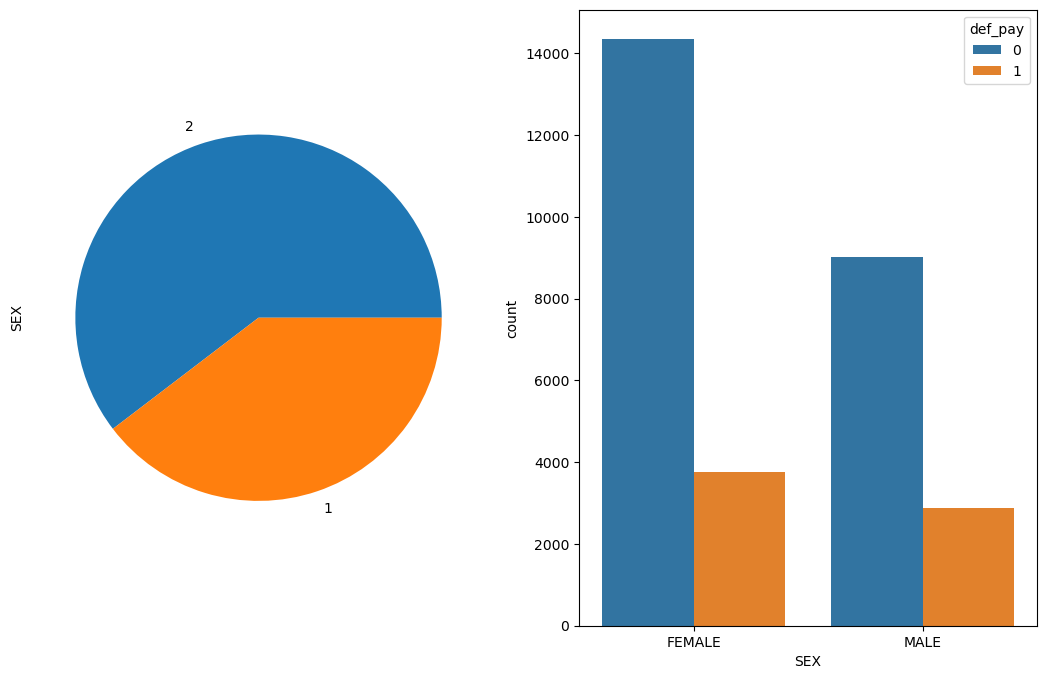

<Figure size 1000x500 with 0 Axes>

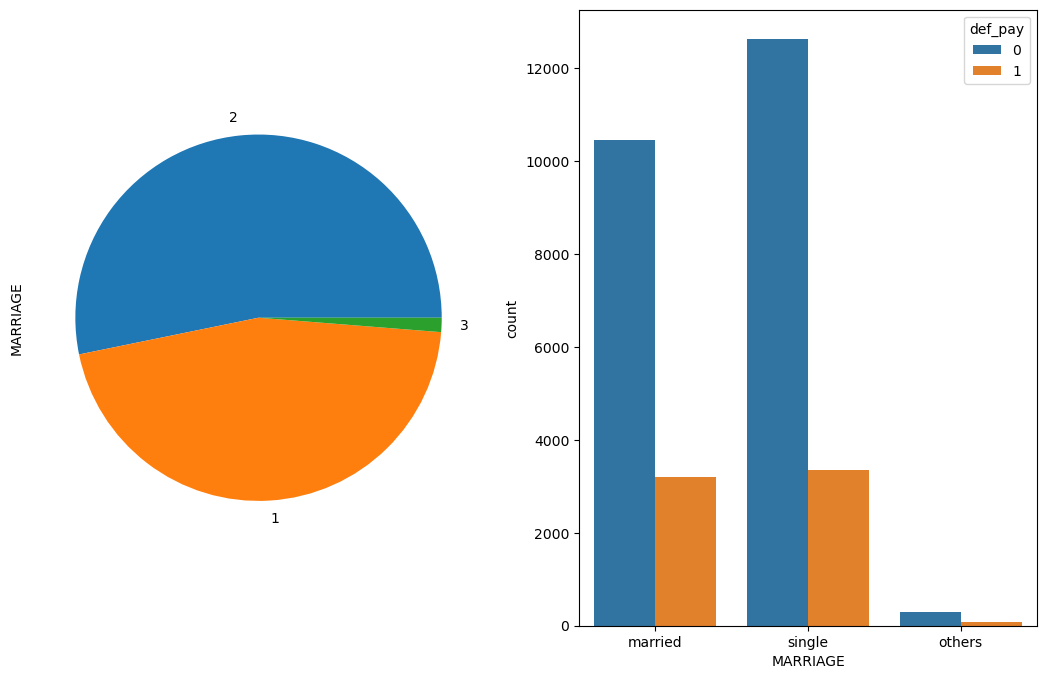

<Figure size 1000x500 with 0 Axes>

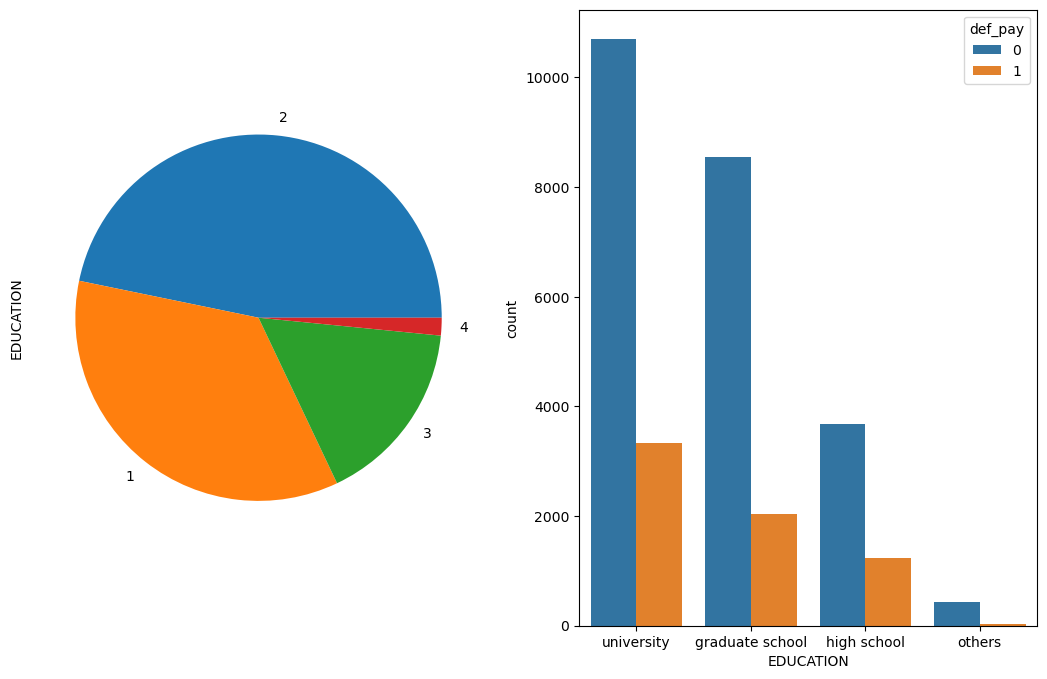

In [24]:
cat_features = ['SEX','MARRIAGE','EDUCATION']
data_cat = data[cat_features]
data_cat['def_pay'] = data['def_pay']
data_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 
                  'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 
                  'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)
for i in cat_features:
    plt.figure(figsize=(10,5))
    fig,axes=plt.subplots(ncols=2,figsize=(13,8))
    data[i].value_counts().plot(kind='pie',ax=axes[0],subplots=True)
    sns.countplot(x=i,hue='def_pay',data=data_cat)
    
    
#違約者中受過教育的人（研究生和大學畢業生）的比例較高
#單身違約率較高

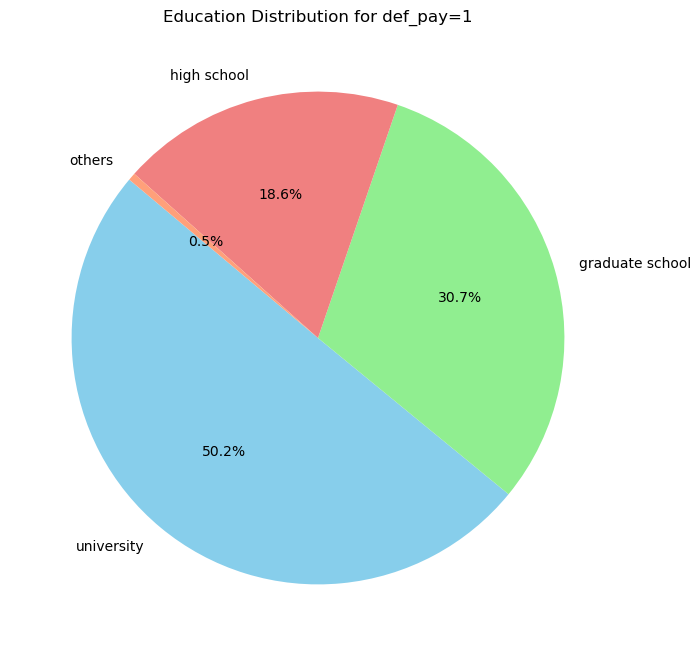

In [16]:
edu_def_pay_1 = data_cat[data_cat['def_pay'] == 1]['EDUCATION'].value_counts(normalize=True)

# 繪製圓餅圖
plt.figure(figsize=(8, 8))
plt.pie(edu_def_pay_1, labels=edu_def_pay_1.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
plt.title('Education Distribution for def_pay=1')
plt.show()

In [11]:
male_nogood = data[(data['SEX'] == 1) & (data['def_pay'] == 1)]
female_nogood = data[(data['SEX'] == 2) & (data['def_pay'] == 1)]

print('男生違約:',len(male_nogood))
print('女生違約:',len(female_nogood))

男生違約: 2873
女生違約: 3763


In [12]:
#性別的違約率

male_percent = len(male_nogood) / len(data[data['SEX'] == 1])
female_percent = len(female_nogood) / len(data[data['SEX'] == 2])

print('男生違約率:',male_percent)
print('女生違約率:',female_percent)

男生違約率: 0.2416722745625841
女生違約率: 0.20776280918727916


In [17]:
marriage_nogood = data[(data['MARRIAGE'] == 1) & (data['def_pay'] == 1)]
single_nogood = data[(data['MARRIAGE'] == 2) & (data['def_pay'] == 1)]
print('結婚違約率: ',len(marriage_nogood))
print('單身違約率: ',len(single_nogood))

結婚違約率:  3206
單身違約率:  3341


In [18]:
#婚姻的違約率

marriage_percent = len(marriage_nogood) / len(data[data['MARRIAGE'] == 1])
single_percent = len(single_nogood) / len(data[data['MARRIAGE'] == 2])

print('結婚違約率: ', marriage_percent)
print('單身違約率: ',single_percent)

結婚違約率:  0.23471703638626545
單身違約率:  0.20928338762214985


C:\Users\leo\AppData\Local\Temp\ipykernel_5228\1645691447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat['AGE'] = data['AGE']


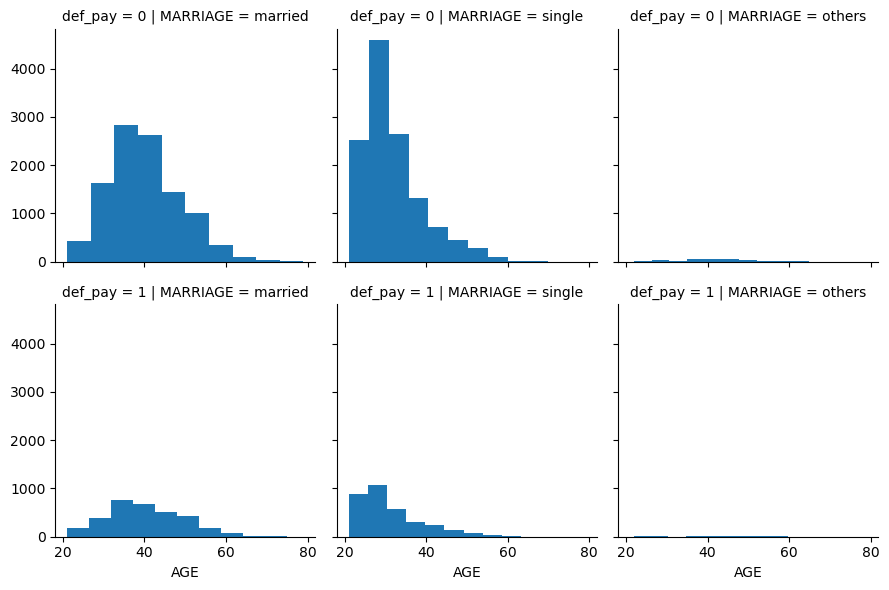

In [31]:
data_cat['AGE'] = data['AGE']
g = sns.FacetGrid(data_cat, row='def_pay', col='MARRIAGE')
g = g.map(plt.hist, 'AGE')
plt.show()

#結婚的30~50歲違約率較高
#沒結婚的20~30歲違約率較高

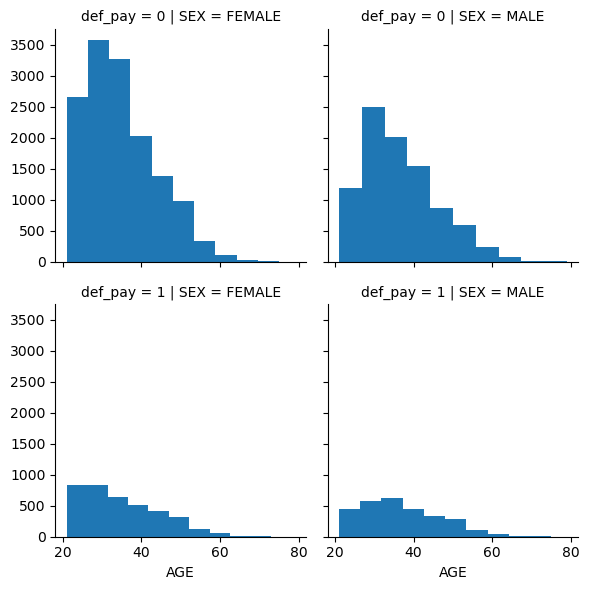

In [34]:
g = sns.FacetGrid(data_cat, row='def_pay', col='SEX')
g = g.map(plt.hist, 'AGE')
plt.show()


#女性20~30歲違約率高
#男性30~40歲違約率高

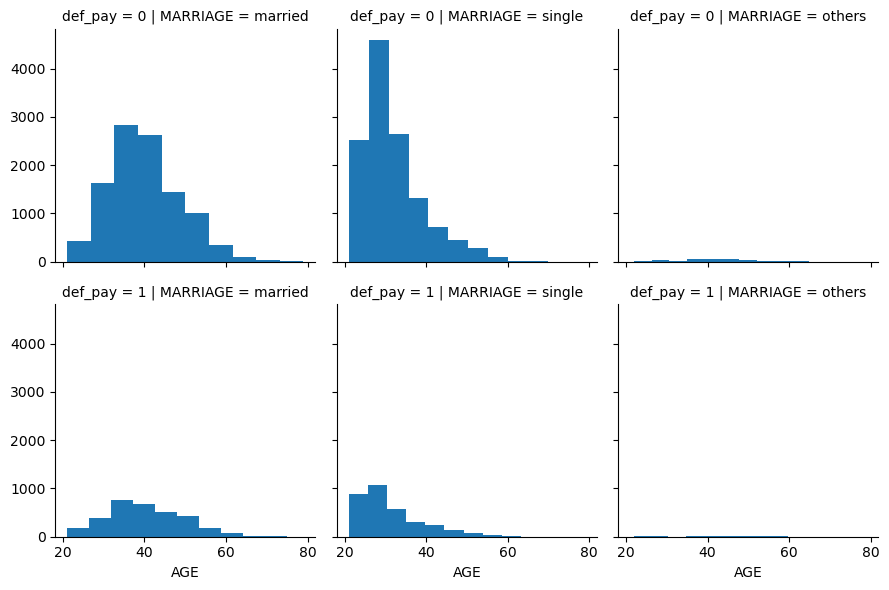

In [23]:
m = sns.FacetGrid(data_cat, row='def_pay', col='MARRIAGE')
m = m.map(plt.hist, 'AGE')
plt.show()

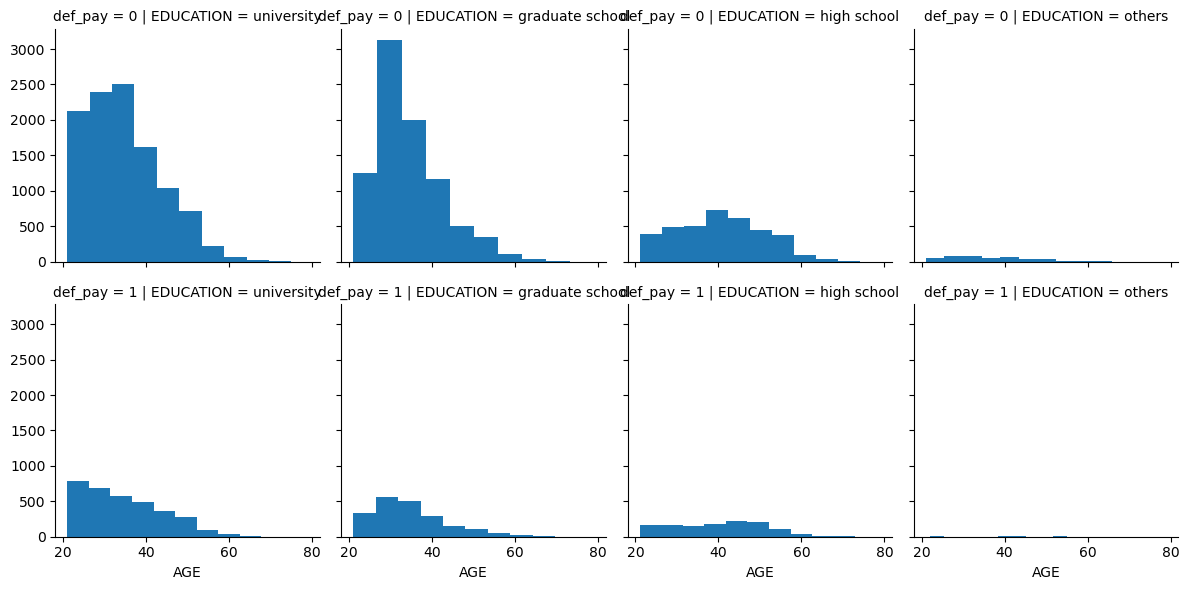

In [24]:
m = sns.FacetGrid(data_cat, row='def_pay', col='EDUCATION')
m = m.map(plt.hist, 'AGE')
plt.show()

In [109]:
pip install --upgrade imbalanced-learn scikit-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/92/e8/86c36e1b13007ca9c89381adac6c078cfc8fb71841a76c08a3fe3eca91d3/imbalanced_learn-0.12.0-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.12.0-py3-none-any.whl.metadata (8.2 kB)
Using cached imbalanced_learn-0.12.0-py3-none-any.whl (257 kB)
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.0
    Uninstalling imbalanced-learn-0.8.0:
      Successfully uninstalled imbalanced-learn-0.8.0
Note: you may need to restart the kernel to use updated packages.


In [6]:
#由於資料不平衡，所以使用SMOTE

# from imblearn.over_sampling import SMOTE

# smote = SMOTE()

# data2 = data.copy()
# x_smote, y_smote = smote.fit_resample(data2.iloc[:,:-1], data2['def_pay'])

# print('Original dataset shape', len(data2))
# print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [13]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 假設您的資料框名稱為 data，'def_pay' 是您的目標欄位
data2 = data.copy()
X = data2.drop('def_pay', axis=1)  # 特徵
y = data2['def_pay']  # 目標變數

# 切分資料集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用 SMOTE 進行過採樣
smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(X_train, y_train)

# 印出過採樣後的類別分佈
print(f"過採樣後，類別 '0' 的樣本數量：{sum(y_train_resampled == 0)}")
print(f"過採樣後，類別 '1' 的樣本數量：{sum(y_train_resampled == 1)}")


過採樣後，類別 '0' 的樣本數量：18677
過採樣後，類別 '1' 的樣本數量：18677


In [14]:
columns = list(data.columns)
columns.pop()
balance_data = pd.DataFrame(x_smote,columns=columns)
balance_data['def_pay'] = y_smote

balance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37354 entries, 0 to 37353
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  37354 non-null  float64
 1   SEX        37354 non-null  int64  
 2   EDUCATION  37354 non-null  int64  
 3   MARRIAGE   37354 non-null  int64  
 4   AGE        37354 non-null  int64  
 5   PAY_1      37354 non-null  int64  
 6   PAY_2      37354 non-null  int64  
 7   PAY_3      37354 non-null  int64  
 8   PAY_4      37354 non-null  int64  
 9   PAY_5      37354 non-null  int64  
 10  PAY_6      37354 non-null  int64  
 11  BILL_AMT1  37354 non-null  float64
 12  BILL_AMT2  37354 non-null  float64
 13  BILL_AMT3  37354 non-null  float64
 14  BILL_AMT4  37354 non-null  float64
 15  BILL_AMT5  37354 non-null  float64
 16  BILL_AMT6  37354 non-null  float64
 17  PAY_AMT1   37354 non-null  float64
 18  PAY_AMT2   37354 non-null  float64
 19  PAY_AMT3   37354 non-null  float64
 20  PAY_AM

In [15]:
##沒有篩選特徵的模型

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,make_scorer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


pipeline_lr = Pipeline([('scalar1',StandardScaler()),
                       ('lr_classifier',LogisticRegression())])
pipeline_dt = Pipeline([('scalar2',StandardScaler()),
                       ('dt_classifier',DecisionTreeClassifier())])
pipeline_rf = Pipeline([('scalar3',StandardScaler()),
                       ('rd_classifier',RandomForestClassifier())])


pipelines = [pipeline_lr,pipeline_dt,pipeline_rf]
pipe_dict = {0:'LogisticRegression',1:'DecisionTree',2:'RandomForest'}

data1 = balance_data.copy()
x = data1.drop(['def_pay'],axis = 1)
y = data1['def_pay']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 10)

for pipe in pipelines:
    pipe.fit(x_train,y_train)

In [16]:
from sklearn.model_selection import cross_val_score

cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, x_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LogisticRegression: -0.520816 
DecisionTree: -0.510608 
RandomForest: -0.408236 


In [17]:
from sklearn.metrics import mean_squared_error,confusion_matrix,classification_report
from sklearn import metrics

pred = []
for i , model in enumerate(pipelines):
    a = model.predict(x_test)
    pred.append(a)
    print(classification_report(y_test,pred[i]))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      5599
           1       0.75      0.70      0.72      5608

    accuracy                           0.73     11207
   macro avg       0.73      0.73      0.73     11207
weighted avg       0.73      0.73      0.73     11207

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      5599
           1       0.74      0.76      0.75      5608

    accuracy                           0.74     11207
   macro avg       0.74      0.74      0.74     11207
weighted avg       0.74      0.74      0.74     11207

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      5599
           1       0.85      0.82      0.83      5608

    accuracy                           0.84     11207
   macro avg       0.84      0.84      0.84     11207
weighted avg       0.84      0.84      0.84     11207



<Axes: >

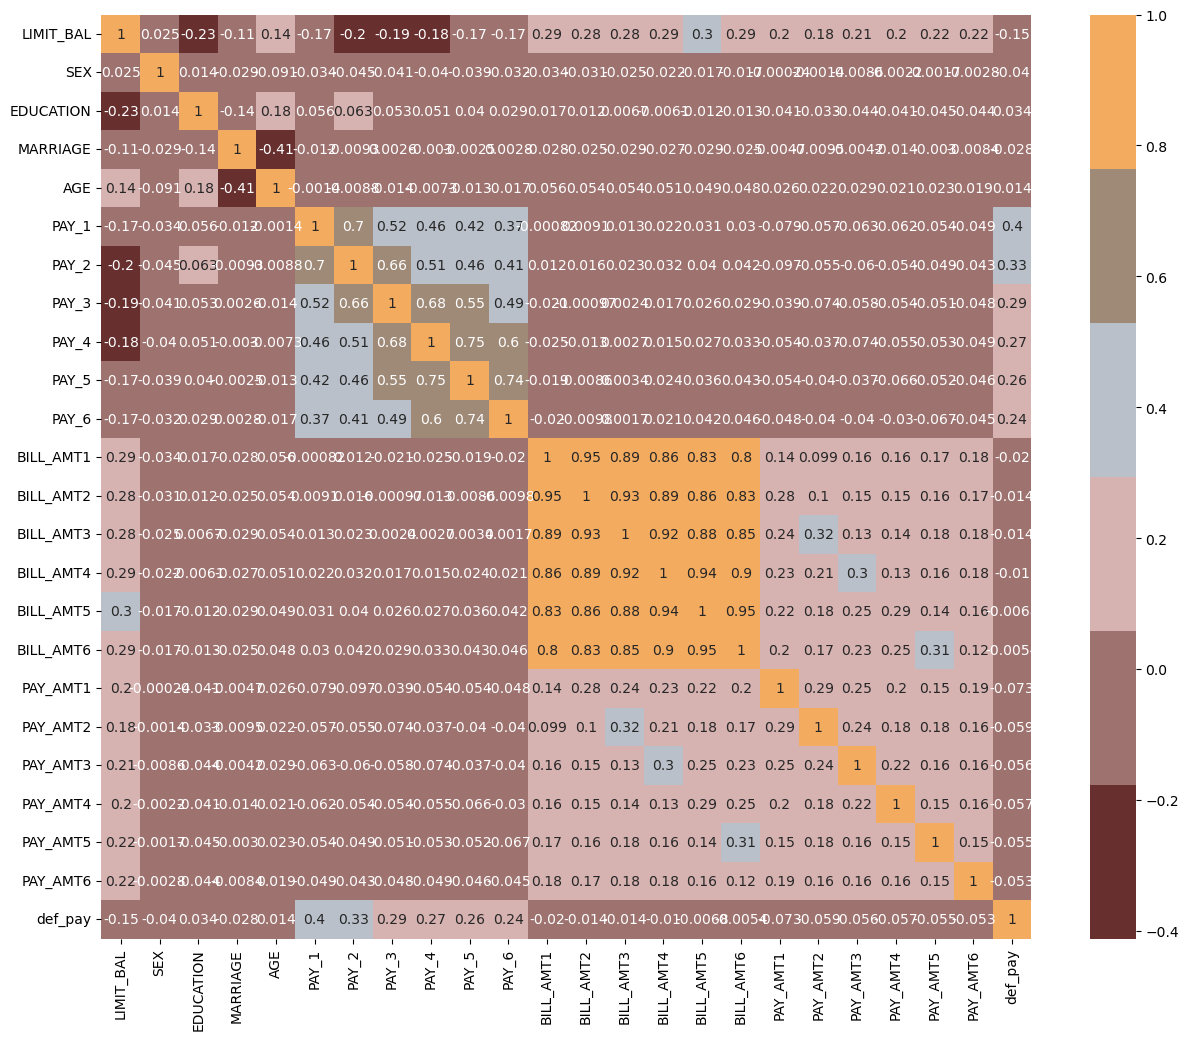

In [73]:
cmap = sns.diverging_palette(205,133,63,as_cmap=True)

data2 = balance_data.copy()
cols = (["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
corrmat = data2.corr()
f,ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmat,cmap=cols,annot=True)

In [30]:
high_corr = ['SEX','MARRIAGE','AGE','EDUCATION','PAY_1','BILL_AMT1','def_pay']

data2 = balance_data.copy()
data2 = data2[high_corr]

data2.head()

,SEX,MARRIAGE,AGE,EDUCATION,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,def_pay
0,2,1,24,2,2,2,0,0,0,0,3913.0,1
1,2,2,26,2,0,2,0,0,0,2,2682.0,1
2,2,2,34,2,0,0,0,0,0,0,29239.0,0
3,2,1,37,2,0,0,0,0,0,0,46990.0,0
4,1,1,57,2,0,0,0,0,0,0,8617.0,0


In [31]:
x = data2.drop(['def_pay'],axis = 1)
y = data2['def_pay']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 10)

for pipe in pipelines:
    pipe.fit(x_train,y_train)

In [32]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, x_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LogisticRegression: -0.530351 
DecisionTree: -0.548555 
RandomForest: -0.518153 


In [33]:
pred = []
for i , model in enumerate(pipelines):
    a = model.predict(x_test)
    pred.append(a)
    print(classification_report(y_test,pred[i]))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73      6966
           1       0.74      0.67      0.70      7053

    accuracy                           0.72     14019
   macro avg       0.72      0.72      0.72     14019
weighted avg       0.72      0.72      0.72     14019

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      6966
           1       0.70      0.70      0.70      7053

    accuracy                           0.70     14019
   macro avg       0.70      0.70      0.70     14019
weighted avg       0.70      0.70      0.70     14019

              precision    recall  f1-score   support

           0       0.73      0.74      0.73      6966
           1       0.74      0.73      0.73      7053

    accuracy                           0.73     14019
   macro avg       0.73      0.73      0.73     14019
weighted avg       0.73      0.73      0.73     14019



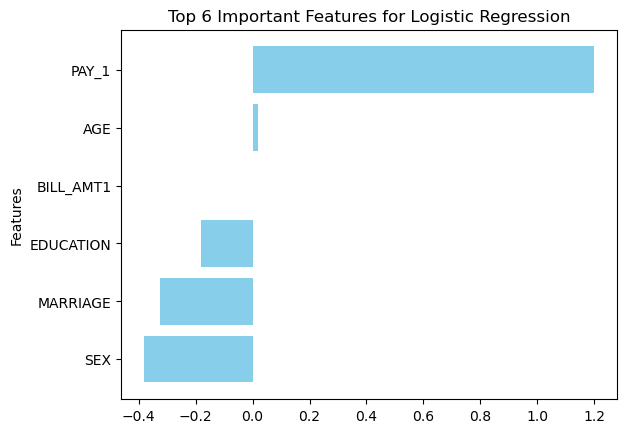

In [45]:
#得出最有用的前6特徵(logistic regression)
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import pandas as pd

high_corr = ['SEX','MARRIAGE','AGE','EDUCATION','PAY_1','BILL_AMT1','def_pay']
data2 = balance_data.copy()
data2 = data2[high_corr]

x = data2.drop(['def_pay'],axis = 1)
y = data2['def_pay']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 10)
logreg_model = LogisticRegression()

logreg_model.fit(x_train, y_train)


selector = RFE(logreg_model, n_features_to_select=6)
selector = selector.fit(x_train, y_train)


selected_features_indices = selector.get_support(indices=True)

selected_features_names = x_train.columns[selected_features_indices]

selected_features_coefficients = logreg_model.coef_[0, selected_features_indices]
selected_features_names = x_train.columns[selected_features_indices]

sorted_indices = selected_features_coefficients.argsort()
sorted_features_coefficients = selected_features_coefficients[sorted_indices]
sorted_features_names = selected_features_names[sorted_indices]

plt.barh(sorted_features_names, sorted_features_coefficients, color='skyblue')
plt.ylabel('Features')
plt.title('Top 6 Important Features for Logistic Regression')

plt.show()



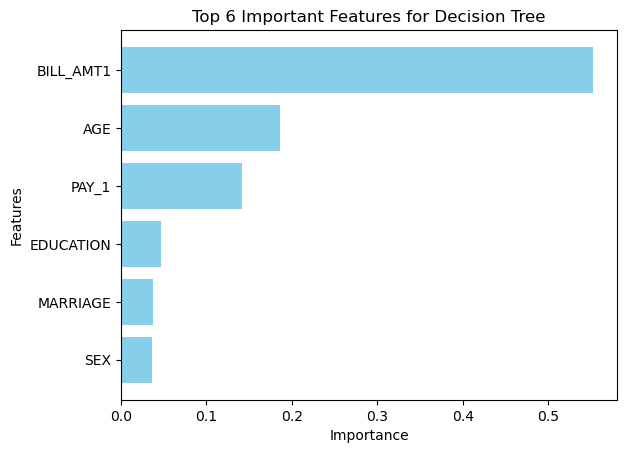

In [48]:
#得出最有用的前6特徵(Decision Tree)

tree_model = DecisionTreeClassifier()

tree_model.fit(X_train, y_train)

feature_importances = tree_model.feature_importances_
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

sorted_features_df = features_df.sort_values(by='Importance', ascending=False)

top_6_features = sorted_features_df.head(6)

top_6_features_names = top_6_features['Feature']
top_6_features_importances = top_6_features['Importance']

sorted_indices = top_6_features_importances.argsort()
sorted_features_names = top_6_features_names.iloc[sorted_indices]
sorted_features_importances = top_6_features_importances.iloc[sorted_indices]

plt.barh(sorted_features_names, sorted_features_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 6 Important Features for Decision Tree')

plt.show()



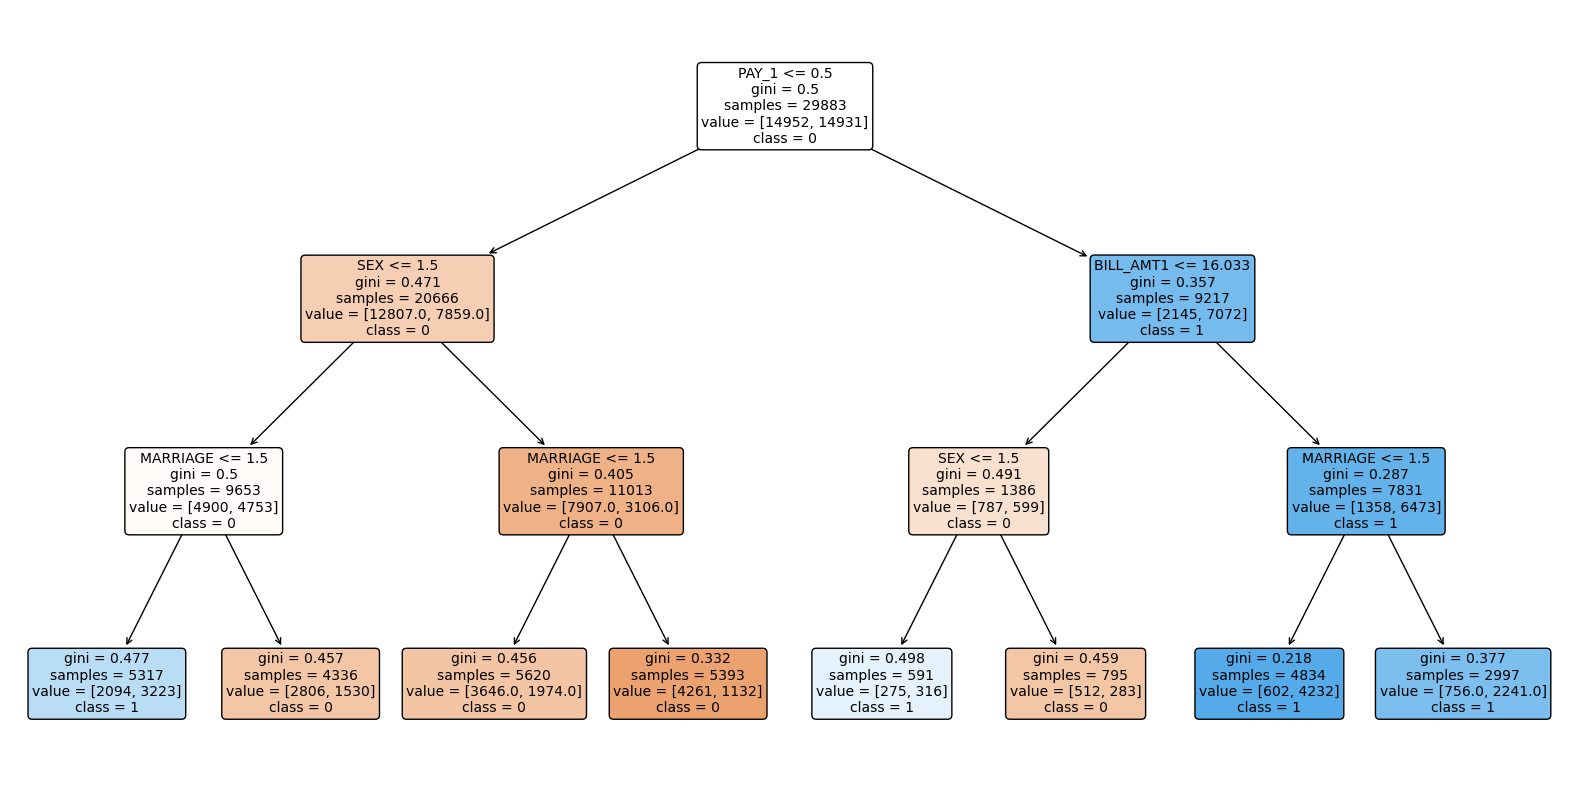

前6重要特徵:
PAY_1        0.591217
SEX          0.147680
MARRIAGE     0.147653
BILL_AMT1    0.113450
AGE          0.000000
EDUCATION    0.000000
dtype: float64


In [47]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

high_corr = ['SEX','MARRIAGE','AGE','EDUCATION','PAY_1','BILL_AMT1','def_pay']
data2 = balance_data.copy()
data2 = data2[high_corr]
X = data2.drop('def_pay', axis=1)  # 特徵
y = data2['def_pay']  # 目標變數

# 切分資料集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用 DecisionTreeClassifier 建立決策樹模型
model = DecisionTreeClassifier(max_depth = 3,random_state=42)
model.fit(X_train, y_train)

# 繪製決策樹
plt.figure(figsize=(20, 10))
tree.plot_tree(model, feature_names=X.columns, class_names=["0", "1"], filled=True, rounded=True)
plt.show()

feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
top_6_features = feature_importance.head(6)
print("前6重要特徵:")
print(top_6_features)